In [41]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
dir_gdl = '../data/processed/2016-2019_3std_preprocessed.csv'
df = pd.read_csv(dir_gdl)
df_data = df.loc[df['PARAM']=='PM10'].copy()
df_data['FECHA'] = pd.to_datetime(df_data.FECHA)
df_data.drop(columns=['Unnamed: 0'], inplace=True)
print(df_data.shape)
df_data.head(2)

(35064, 13)


,FECHA,HORA,PARAM,AGU,ATM,CEN,LDO,LPIN,MIR,OBL,SFE,TLA,VAL
4,2016-01-01 00:00:00,00:00,PM10,49.92,146.95,86.12,174.04,NaN,69.75,197.67,115.54,143.40,17.08
13,2016-01-01 01:00:00,01:00,PM10,52.80,NaN,46.49,115.27,NaN,68.99,138.09,84.24,100.46,29.15


In [30]:
df_data['weekday'] = df_data.apply(lambda row: row.loc['FECHA'].weekday(), axis=1)
df_data['month'] = df_data.apply(lambda row: row.loc['FECHA'].month, axis=1)
df_data['year'] = df_data.apply(lambda row: row.loc['FECHA'].year, axis=1)

In [35]:
baseline = df_data.groupby(['year','month','weekday','HORA']).agg(
                      ['mean','std']).copy()

In [36]:
baseline

AGU                 ATM                 CEN  \
                             mean        std     mean        std     mean   
year month weekday HORA                                                     
2016 1     0       00:00  19.0150  20.828501  35.8900  19.404269  42.7625   
                   01:00  22.6050  16.481878  34.0325  18.674980  36.5250   
                   02:00  20.8125  13.910884  30.2225  19.255336  38.0250   
                   03:00  17.3125  13.736107  26.5100  17.491659  35.8375   
                   04:00  20.5600  10.060015  23.2900  16.312664  38.0450   
...                           ...        ...      ...        ...      ...   
2019 12    6       19:00      NaN        NaN  39.9000  17.427708  22.4020   
                   20:00      NaN        NaN  39.2000   4.124924  21.8980   
                   21:00      NaN        NaN  33.9000  17.855531  23.6440   
                   22:00      NaN        NaN  38.2800  27.726828  31.6940   
                   23:00      NaN        NaN  42.4600  29.852521  36.4080   

                                           LDO               LPIN             \
                                std       mean        std    mean        std   
year month weekday HORA                                                        
2016 1     0       00:00  32.718439  36.070000   1.519474     NaN        NaN   
                   01:00  19.265144  37.180000   6.331264     NaN        NaN   
                   02:00  14.194982  30.473333   2.837892     NaN        NaN   
                   03:00  14.359369  21.306667   3.657900     NaN        NaN   
                   04:00  19.494419  22.140000   8.458741     NaN        NaN   
...                             ...        ...        ...     ...        ...   
2019 12    6       19:00   9.979906  80.280000  31.070677   75.06  36.429356   
                   20:00  11.738125  82.340000  32.710824  103.08  46.770685   
                   21:00  14.722324  70.200000  24.542820  137.68  71.797263   
                   22:00  23.158766  64.040000  24.586439  141.18  69.531338   
                   23:00  29.957488  73.200000  21.931256  129.92  61.642331   

                             MIR          OBL                 SFE             \
                            mean std     mean        std     mean        std   
year month weekday HORA                                                        
2016 1     0       00:00   54.21 NaN  34.8800  20.416257  98.7975  37.725611   
                   01:00   51.75 NaN  26.8450  18.633651  97.3325  19.178270   
                   02:00   51.39 NaN  19.9950  13.668790  56.0775  16.506256   
                   03:00  129.25 NaN  15.3900  12.660932  52.5400  16.001642   
                   04:00  253.64 NaN  14.5575  11.505209  52.2300  13.431542   
...                          ...  ..      ...        ...      ...        ...   
2019 12    6       19:00     NaN NaN      NaN        NaN      NaN        NaN   
                   20:00     NaN NaN      NaN        NaN      NaN        NaN   
                   21:00     NaN NaN      NaN        NaN      NaN        NaN   
                   22:00     NaN NaN      NaN        NaN      NaN        NaN   
                   23:00     NaN NaN      NaN        NaN      NaN        NaN   

                                TLA                   VAL             
                               mean        std       mean        std  
year month weekday HORA                                               
2016 1     0       00:00  29.860000  11.593777  32.646667  24.928165  
                   01:00  29.407500   6.854523  26.590000  22.746761  
                   02:00  29.082500   4.272871  22.255000  15.390734  
                   03:00  27.175000   2.180482  19.902500  14.283392  
                   04:00  24.862500   2.235582  17.437500  10.806120  
...                             ...        ...        ...        ...  
2019 12    6       19:00  65.270000  10.854128  15.800000   7.401802  

<ErrorbarContainer object of 3 artists>

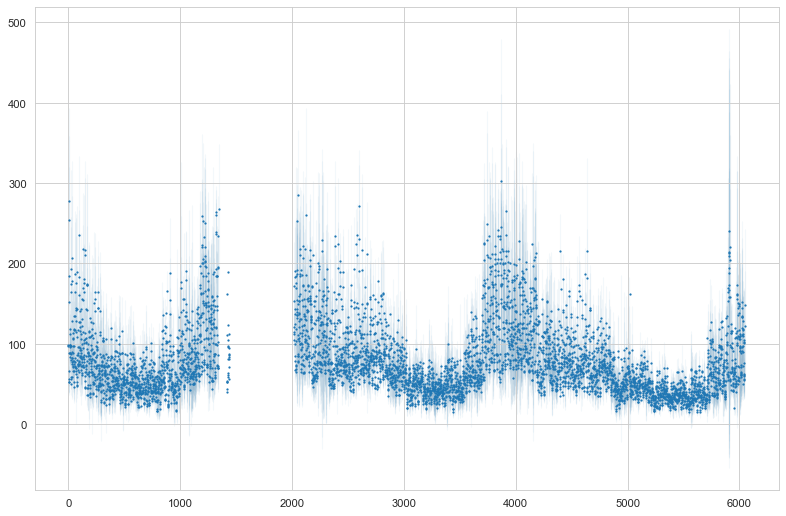

In [71]:
sns.set_style("whitegrid")
station = 'SFE'
plt.figure(figsize=(12, 8), dpi=80)
plt.scatter(x=range(len(baseline)),y=baseline[station]['mean'], s=1)
plt.errorbar(range(len(baseline)), baseline[station]['mean'], baseline[station]['std'], elinewidth=1, linestyle='None', zorder=-1, alpha=0.05)

In [87]:
def year_baseline(df, year_range, station):
    
    plt.figure(figsize=(12, 8), dpi=80)

    for y in year_range:
        df_tmp = df.reset_index().loc[df.reset_index().year==y, station].copy()
        plt.scatter(x=range(len(df_tmp)),y=df_tmp['mean'], s=1)
        plt.errorbar(range(len(df_tmp)), df_tmp['mean'], df_tmp['std'], elinewidth=1, linestyle='None', zorder=-1, alpha=0.05)

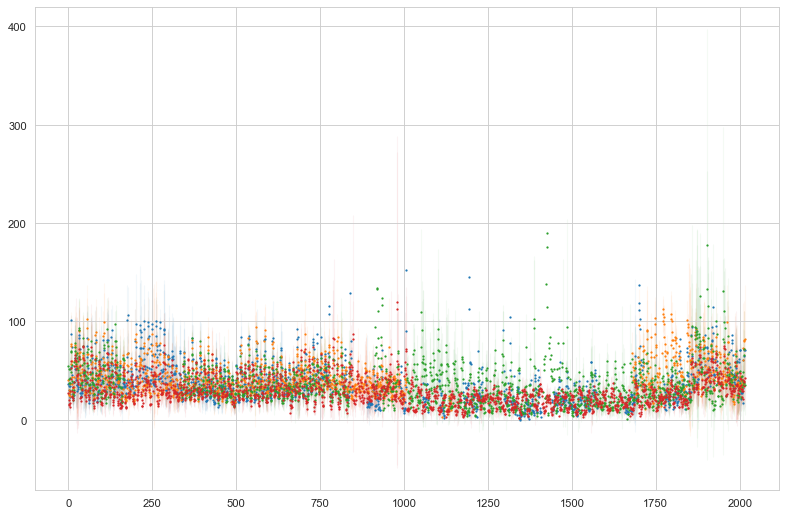

In [88]:
year_range = [2016,2017,2018,2019]
station = 'ATM'

year_baseline(baseline, year_range, station)